<a href="https://colab.research.google.com/github/9922829133/EDA-Project/blob/main/Hotel_Booking_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    -  **Hotel Booking Analysis**
##### **Project Type**    - EDA
##### **Contribution**    - Individual

# **Project Summary -**
The Hotel Booking Analysis EDA project dives into a diverse dataset of hotel bookings to uncover trends, customer preferences, and cancellation patterns. By analyzing this data, it aims to help hotels optimize staffing, personalize services, and refine strategies for better guest experiences and business growth.

# **GitHub Link -**

# **Problem Statement**
**Business Context**

Have you ever wondered when the best time of year to book a hotel room is? Or the optimal length of stay in order to get the best daily rate? What if you wanted to predict whether or not a hotel was likely to receive a disproportionately high number of special requests? This hotel booking dataset can help you explore those questions! This data set contains booking information for a city hotel and a resort hotel, and includes information such as when the booking was made, length of stay, the number of adults, children, and/or babies, and the number of available parking spaces, among other things. All personally identifying information has been removed from the data. Explore and analyse the data to discover important factors that govern the bookings.

# **General Guidelines** : -
**Project Evaluation Criteria**

1) Efficient approach to the problem statement

2) Data Exploration techniques and logic.

3) Logic of handling missing values, and outliers.

4) Visualization logic.

5) How to form insights and understandings.

# ***Let's Begin !***

**Import Libraries**

In [1]:
# Import Libraries
import pandas as pd
import numpy as np
import seaborn as sns
import ast
from matplotlib import pyplot as plt
%matplotlib inline

**Dataset Loading**

In [2]:
# Load Dataset
dataset=""
df=pd.read_csv('/content/Hotel Bookings.csv')

**Dataset First View**

In [3]:
# Dataset First Look
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


 **Dataset Rows & Columns count**

In [4]:
# Dataset Rows & Columns count
print("Number of Rows:", df.shape[0])
print("Number of Columns:", df.shape[1])

Number of Rows: 119390
Number of Columns: 32


**Dataset Information**

In [5]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

**Duplicate Values**

In [6]:
# Dataset Duplicate Value Count
print("Duplicate Value Count:",df.duplicated().sum())
# We have removed these duplicate values using drop.duplicate
df.drop_duplicates(inplace=True)
# After droping duplicate vaues we have 87396 rows
rows_after_droping_duplicates=df.shape[0]
print("Rows count after removing duplicate values:",rows_after_droping_duplicates)

Duplicate Value Count: 31994
Rows count after removing duplicate values: 87396


**Missing Values/Null Values**

In [7]:
# Missing Values/Null Values Count
print('Null value count:\n',df.isnull().sum().sort_values(ascending=0))

Null value count:
 company                           82137
agent                             12193
country                             452
children                              4
reserved_room_type                    0
assigned_room_type                    0
booking_changes                       0
deposit_type                          0
hotel                                 0
previous_cancellations                0
days_in_waiting_list                  0
customer_type                         0
adr                                   0
required_car_parking_spaces           0
total_of_special_requests             0
reservation_status                    0
previous_bookings_not_canceled        0
is_repeated_guest                     0
is_canceled                           0
distribution_channel                  0
market_segment                        0
meal                                  0
babies                                0
adults                                0
stays_in_week_nights 

<Axes: >

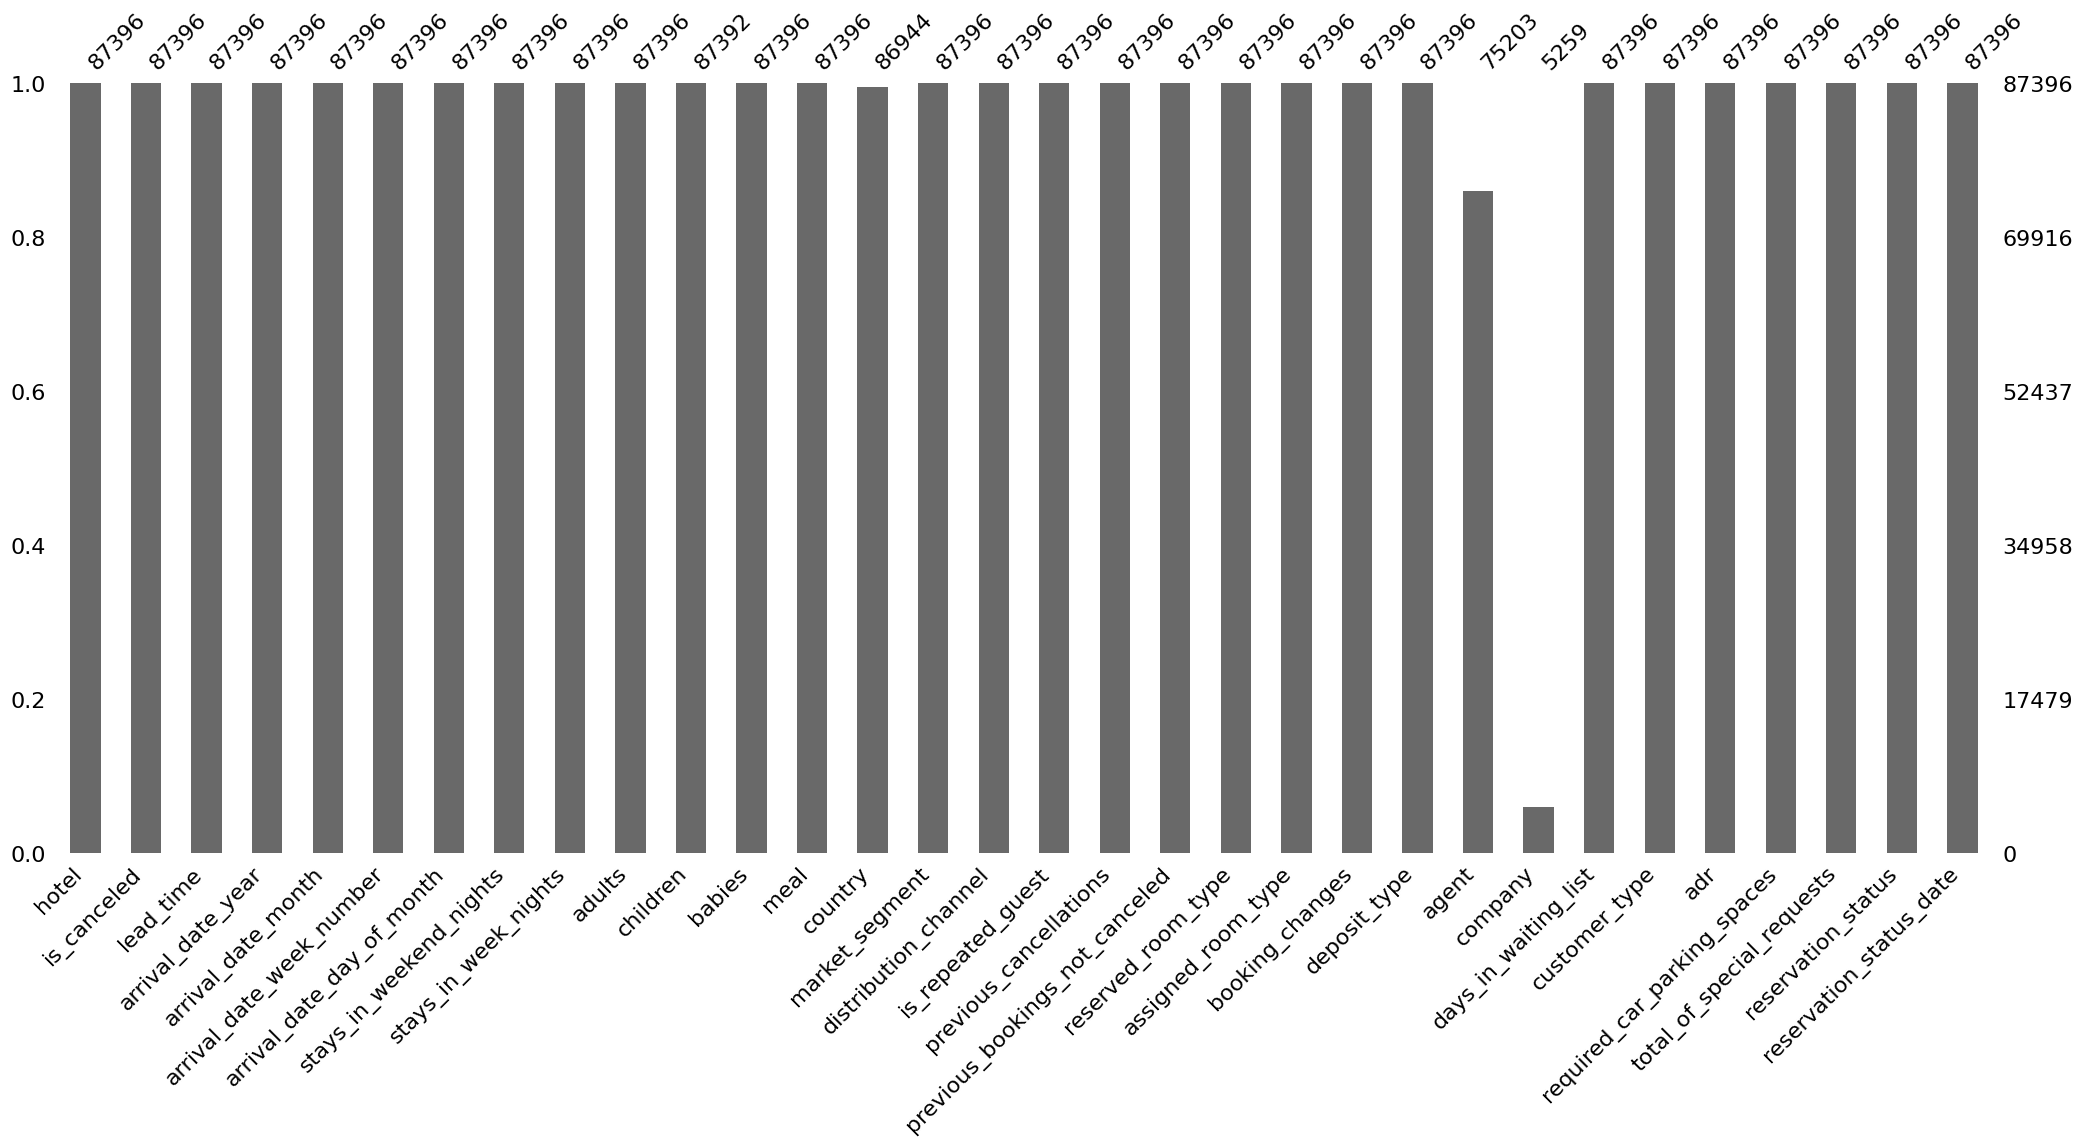

In [8]:
# Visualizing the missing values
# for visualinsing we have used missingno library
# run the command pip install missingno to install the library
import missingno
missingno.bar(df)

# **Understanding Your Variables**


In [9]:
# Dataset Columns
print(df.columns)

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')


In [10]:
# Dataset Describe
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,87392.000000,87396.000000,87396.000000,87396.000000,87396.000000,87396.000000,75203.000000,5259.000000,87396.000000,87396.000000,87396.000000,87396.000000
mean,0.274898,79.891368,2016.210296,26.838334,15.815541,1.005263,2.625395,1.875795,0.138640,0.010824,0.039075,0.030413,0.183990,0.271603,94.138306,183.081384,0.749565,106.337246,0.084226,0.698567
std,0.446466,86.052325,0.686102,13.674572,8.835146,1.031921,2.053584,0.626500,0.455881,0.113597,0.193775,0.369145,1.731894,0.727245,113.188172,130.557608,10.015731,55.013953,0.281533,0.831946
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,11.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,47.000000,0.000000,72.000000,0.000000,0.000000
50%,0.000000,49.000000,2016.000000,27.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,169.000000,0.000000,98.100000,0.000000,0.000000
75%,1.000000,125.000000,2017.000000,37.000000,23.000000,2.000000,4.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,240.000000,263.000000,0.000000,134.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


**Check Unique Values for each variable .**

In [11]:
# Check Unique Values for each variable.
print(df.apply(lambda column: column.unique()))

hotel                                                    [Resort Hotel, City Hotel]
is_canceled                                                                  [0, 1]
lead_time                         [342, 737, 7, 13, 14, 0, 9, 85, 75, 23, 35, 68...
arrival_date_year                                                [2015, 2016, 2017]
arrival_date_month                [July, August, September, October, November, D...
arrival_date_week_number          [27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 3...
arrival_date_day_of_month         [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14...
stays_in_weekend_nights           [0, 1, 2, 4, 3, 6, 13, 8, 5, 7, 12, 9, 16, 18,...
stays_in_week_nights              [0, 1, 2, 3, 4, 5, 10, 11, 8, 6, 7, 15, 9, 12,...
adults                            [2, 1, 3, 4, 40, 26, 50, 27, 55, 0, 20, 6, 5, 10]
children                                            [0.0, 1.0, 2.0, 10.0, 3.0, nan]
babies                                                             [0, 1, 2,

# **Data Wrangling**

**Data Cleaning**

In [12]:
# as above data we have the 4 columns in which null values are present
# to get rid on the null values lets calculte the percentage of null values
null_values=(df.isnull().sum().sort_values(ascending=0))/df.shape[0]*100
null_values[:4]

company     93.982562
agent       13.951439
country      0.517186
children     0.004577
dtype: float64

In [13]:
#as we see the % of null values in company column is more that 93. It is easy to dropping the column instead filling null values
df.drop(['company'], axis=1, inplace=True)
df.shape

(87396, 31)

In [14]:
# to get rid on null values in agent column
df['agent'].unique()

array([ nan, 304., 240., 303.,  15., 241.,   8., 250., 115.,   5., 175.,
       134., 156., 243., 242.,   3., 105.,  40., 147., 306., 184.,  96.,
         2., 127.,  95., 146.,   9., 177.,   6., 143., 244., 149., 167.,
       300., 171., 305.,  67., 196., 152., 142., 261., 104.,  36.,  26.,
        29., 258., 110.,  71., 181.,  88., 251., 275.,  69., 248., 208.,
       256., 314., 126., 281., 273., 253., 185., 330., 334., 328., 326.,
       321., 324., 313.,  38., 155.,  68., 335., 308., 332.,  94., 348.,
       310., 339., 375.,  66., 327., 387., 298.,  91., 245., 385., 257.,
       393., 168., 405., 249., 315.,  75., 128., 307.,  11., 436.,   1.,
       201., 183., 223., 368., 336., 291., 464., 411., 481.,  10., 154.,
       468., 410., 390., 440., 495., 492., 493., 434.,  57., 531., 420.,
       483., 526., 472., 429.,  16., 446.,  34.,  78., 139., 252., 270.,
        47., 114., 301., 193., 182., 135., 350., 195., 352., 355., 159.,
       363., 384., 360., 331., 367.,  64., 406., 16

In [15]:
#as we  can see there is multiple unique values
#so, we have to take mean of the numbers and put instead null values
avg_agent=int(round(df['agent'].mean()))
df['agent'].fillna(value=avg_agent, inplace=True)

In [16]:
# in country there is arount 0.5% null values we can fill 'Others' instead of null value
df['country'].fillna(value='Others', inplace=True)

In [17]:
# as we can see % of null vaules in children column is very less so we can put 0 instead null values
df['children'].fillna(value = 0, inplace = True)

In [18]:
#to cross check null values we have fixed
print((df.isnull().sum().sort_values(ascending=0))/df.shape[0]*100)

hotel                             0.0
is_repeated_guest                 0.0
reservation_status                0.0
total_of_special_requests         0.0
required_car_parking_spaces       0.0
adr                               0.0
customer_type                     0.0
days_in_waiting_list              0.0
agent                             0.0
deposit_type                      0.0
booking_changes                   0.0
assigned_room_type                0.0
reserved_room_type                0.0
previous_bookings_not_canceled    0.0
previous_cancellations            0.0
distribution_channel              0.0
is_canceled                       0.0
market_segment                    0.0
country                           0.0
meal                              0.0
babies                            0.0
children                          0.0
adults                            0.0
stays_in_week_nights              0.0
stays_in_weekend_nights           0.0
arrival_date_day_of_month         0.0
arrival_date

#**Column Manipulation**

In [19]:
# as we seen datatype in info of dataset
# number of children and agent could not float
# so we will change the datatype of children and anget to int64
df[['children', 'agent']] = df[['children', 'agent']].astype('int64')

In [20]:
# Total stays in hotel is week+weekend nights
# So we will need to create a new column for total stay
df['total_stays'] = df ['stays_in_week_nights'] + df ['stays_in_weekend_nights']

In [21]:
# to calculate revenue of hotel we need to multiply average daily rate(adr)*total stays
df['revenue']=df['total_stays']*df['adr']

In [22]:
# to calculate total people coming per booking we will create a column name total_guests
df['total_guests']=df['adults']+df['children']+df['babies']

#**Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables**

**Chart - 1**

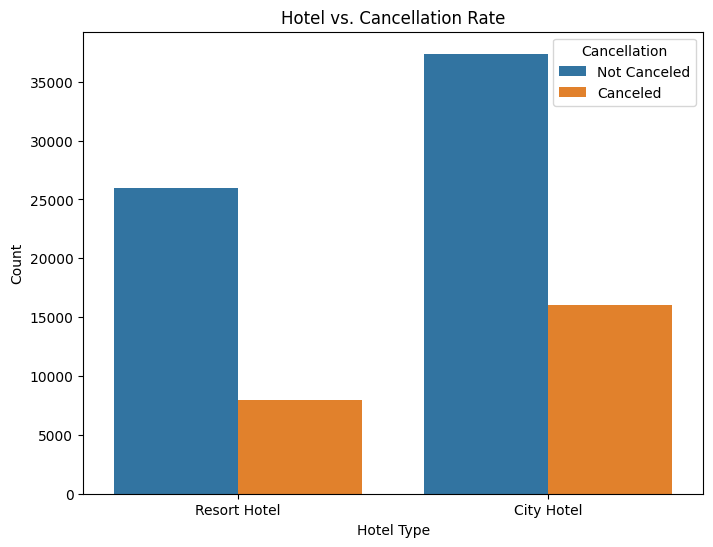

In [23]:
# Hotel vs Cancelation
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='hotel', hue='is_canceled')
plt.title('Hotel vs. Cancellation Rate')
plt.xlabel('Hotel Type')
plt.ylabel('Count')
plt.legend(title='Cancellation', labels=['Not Canceled', 'Canceled'])
plt.show()

**1. Why did you pick the specific chart?**

I have choosen countplot for hotel cancellaiton across resort hotels and city hotels to find the count of cancellation rate

**2. What is/are the insight(s) found from the chart?**

By visualising cacellation rates across hotels we can find out

1) Cacellation rate camparison,

2) Booking behavior

3) Business strategy.


**3. Will the gained insights help creating a positive business impact?**

Are there any insights that lead to negative growth? Justify with specific reason.

**Positive Impact:**

Optimized pricing and marketing strategies.

Enhanced resource allocation.

Improved customer satisfaction.

**Negative Impact:**

Overemphasis on one hotel type.

Discounting strategies affecting revenue.

Seasonal variations requiring adaptation.

Narrow customer segmentation risks.


**Chart - 2**

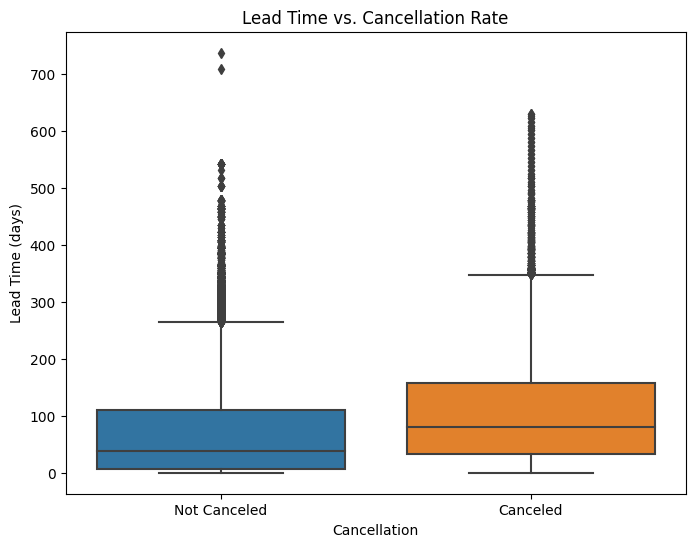

In [24]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='is_canceled', y='lead_time')
plt.title('Lead Time vs. Cancellation Rate')
plt.xlabel('Cancellation')
plt.ylabel('Lead Time (days)')
plt.xticks([0, 1], ['Not Canceled', 'Canceled'])
plt.show()

**1. Why did you pick the specific chart?**

I have used Boxplot. This plot will show the distribution of lead times for both canceled and non-canceled bookings, allowing you to compare lead times and cancellation rates.

**2. What is/are the insight(s) found from the chart?**

we can know lead time impact, also find outliers, booking behavior and business strategy

**3. Will the gained insights help creating a positive business impact?**

Are there any insights that lead to negative growth? Justify with specific reason.

**Positive Impact:**

Optimized booking policies and revenue management.

Efficient resource planning and targeted marketing.

Improved customer segmentation for tailored strategies.

**Negative Impact:**

Overly restrictive policies discouraging last-minute bookings.

Pricing pitfalls affecting profitability.

Potential negative impact on customer experience.

Competitive disadvantage if policies are too rigid.


**Chart - 3**

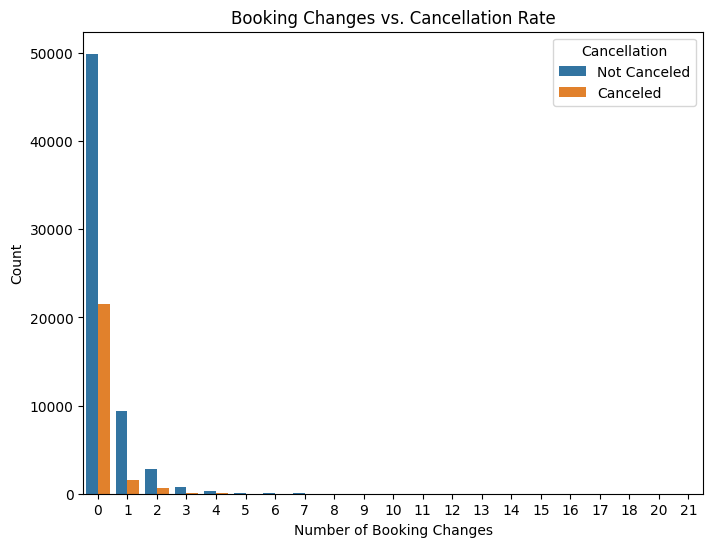

In [25]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='booking_changes', hue='is_canceled')
plt.title('Booking Changes vs. Cancellation Rate')
plt.xlabel('Number of Booking Changes')
plt.ylabel('Count')
plt.legend(title='Cancellation', labels=['Not Canceled', 'Canceled'])
plt.show()

**1. Why did you pick the specific chart?**

I chose a count plot because it effectively shows the distribution of cancellations and non-cancellations for different numbers of booking changes. It helps in visualizing the relationship between these variables.Answer Here.

**2. What is/are the insight(s) found from the chart?**

The chart reveals that bookings with no changes or a single change have a lower likelihood of being canceled compared to bookings with multiple changes.

**3. Will the gained insights help creating a positive business impact?**

Are there any insights that lead to negative growth? Justify with specific reason.

Yes, the insights can have a positive business impact. They suggest that bookings with multiple changes may be associated with higher cancellation rates. The business can consider strategies to optimize these bookings and potentially reduce cancellations.

**Chart - 4**

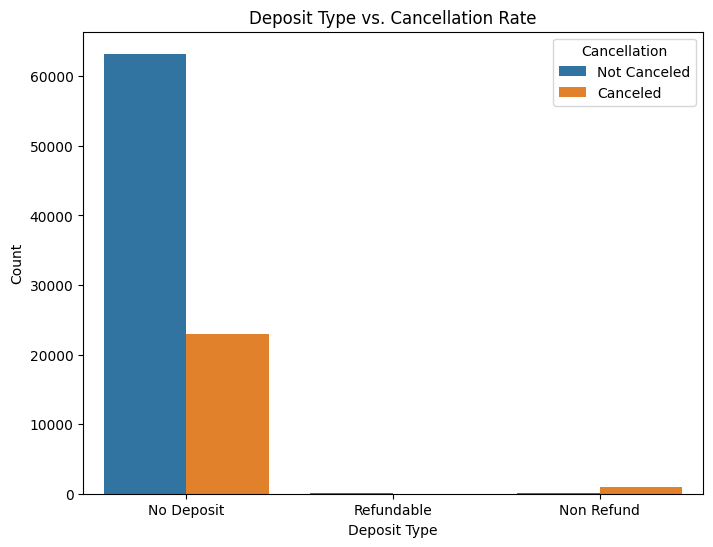

In [26]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='deposit_type', hue='is_canceled')
plt.title('Deposit Type vs. Cancellation Rate')
plt.xlabel('Deposit Type')
plt.ylabel('Count')
plt.legend(title='Cancellation', labels=['Not Canceled', 'Canceled'])
plt.show()

**1. Why did you pick the specific chart?**

I chose a count plot because it effectively visualizes the distribution of deposit types for both canceled and non-canceled bookings, making it easy to compare their relationships with cancellation rates.

**2. What is/are the insight(s) found from the chart?**

The chart reveals that bookings with a "No Deposit" type have the highest count for both cancellations and non-cancellations. Bookings with a "Refundable" deposit type have the lowest cancellation count. This suggests that guests who make refundable deposits are less likely to cancel.

**3. Will the gained insights help creating a positive business impact?**

Are there any insights that lead to negative growth? Justify with specific reason.

Yes, these insights can have a positive business impact. They indicate that offering refundable deposit options might reduce cancellation rates, potentially leading to increased booking stability and revenue.

**Chart - 5**

<ipython-input-27-05749838578f>:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=df, x='customer_type', y='total_of_special_requests', ci=None)


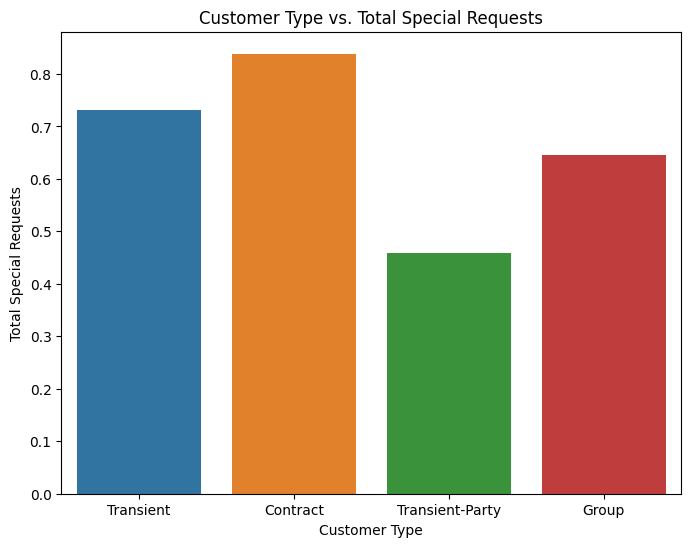

In [27]:
plt.figure(figsize=(8, 6))
sns.barplot(data=df, x='customer_type', y='total_of_special_requests', ci=None)
plt.title('Customer Type vs. Total Special Requests')
plt.xlabel('Customer Type')
plt.ylabel('Total Special Requests')
plt.show()

**1. Why did you pick the specific chart?**

I chose a bar plot because it effectively compares the total number of special requests across different customer types, making it easy to identify patterns and differences.Answer Here.

**2. What is/are the insight(s) found from the chart?**

The chart reveals that customers classified as "Transient-Party" tend to have the highest total number of special requests, followed by "Transient" customers. In contrast, "Contract" and "Group" customers have significantly fewer special requests.

**3. Will the gained insights help creating a positive business impact?**

Are there any insights that lead to negative growth? Justify with specific reason.

Yes, these insights can help create a positive business impact. Understanding which customer types have more special requests allows the hotel to tailor its services and offerings to meet the preferences and needs of different customer segments.

**Chart - 6**

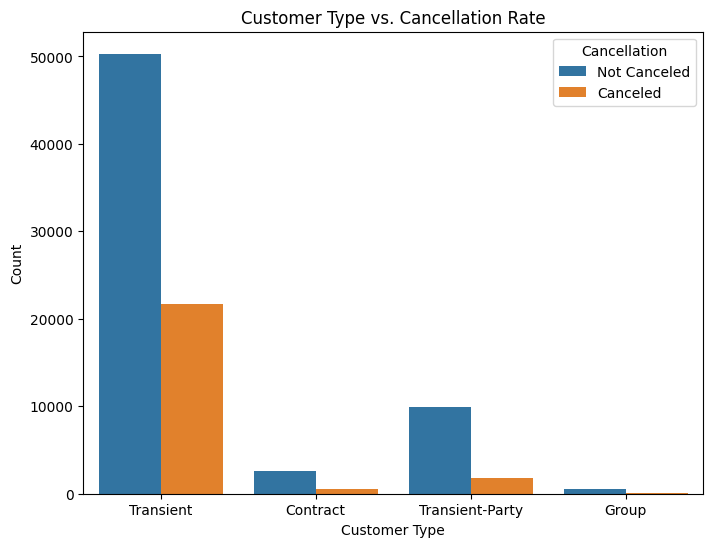

In [28]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='customer_type', hue='is_canceled')
plt.title('Customer Type vs. Cancellation Rate')
plt.xlabel('Customer Type')
plt.ylabel('Count')
plt.legend(title='Cancellation', labels=['Not Canceled', 'Canceled'])
plt.show()

**1. Why did you pick the specific chart?**

I chose a count plot because it effectively visualizes the distribution of cancellations for different customer types, allowing for easy comparison of cancellation rates.

**2. What is/are the insight(s) found from the chart?**

The chart shows that customers classified as "Transient" have the highest count for both cancellations and non-cancellations. In contrast, "Group" customers have the lowest count for both categories. However, "Transient" customers also have the highest number of cancellations overall.

**3. Will the gained insights help creating a positive business impact?**

Are there any insights that lead to negative growth? Justify with specific reason.

Yes, these insights can help create a positive business impact. Understanding the cancellation patterns among different customer types allows the hotel to tailor its booking and cancellation policies, as well as marketing efforts, to optimize revenue and customer satisfaction.

#**Solution to Business Objective**

**What do you suggest the client to achieve Business Objective ?**
Explain Briefly.

Optimize Booking Channels: Encourage direct bookings through the hotel's website to reduce cancellations and increase revenue. Offer incentives for guests to book directly.

Customer Segmentation: Focus on "Transient" customers, who have higher booking and cancellation rates. Implement personalized marketing and services to increase loyalty.

Special Requests: Promote additional services to encourage guests to make more special requests. Bookings with special requests tend to have lower cancellations, increasing booking stability and revenue.

Lead Time: Lead time alone may not predict cancellations effectively. Consider combining lead time with other factors for more accurate prediction models.

Diversify Distribution: Maintain a balanced distribution strategy to avoid over-dependence on a single channel. Negative growth can result from channel dominance.

Room Type Allocation: Optimize room type allocation. Certain room types have lower cancellation rates. Strategically promote or allocate these room types to enhance booking stability.

Dynamic Pricing: Implement dynamic pricing strategies based on insights. Adjust pricing based on lead time, customer type, and other factors to maximize revenue and minimize cancellations.

Resource Allocation: Efficiently manage resources to meet special requests without compromising overall operations or profitability.

#**Conclusion**

In conclusion, the analysis of the hotel booking dataset has provided valuable insights that can help the client achieve their business objectives in the hospitality industry. By examining various factors, including booking channels, customer segmentation, special requests, lead time, distribution channels, room type allocation, dynamic pricing, and resource allocation, several actionable suggestions have emerged:

Direct Bookings: Encourage direct bookings through the hotel's website to reduce cancellations and increase revenue. This can be achieved through incentives and promotions.

Customer Engagement: Focus on "Transient" customers, offering personalized services and marketing to increase loyalty and mitigate cancellations.

Special Requests: Promote additional services to encourage guests to make special requests, which tend to result in lower cancellations and increased booking stability.

Predictive Modeling: Incorporate lead time along with other factors in predictive models to enhance the accuracy of cancellation predictions.

Diversified Distribution: Maintain a balanced distribution strategy to prevent over-reliance on a single booking channel and mitigate potential negative growth.

Room Type Optimization: Optimize room type allocation by strategically promoting or allocating room types with lower cancellation rates.

Dynamic Pricing: Implement dynamic pricing strategies based on insights to maximize revenue and minimize cancellations.

Resource Management: Efficiently manage resources to meet special requests without compromising overall operations or profitability.

By implementing these suggestions, the client can work towards improving their booking operations, increasing revenue, reducing cancellations, and enhancing customer satisfaction. The insights gained from this analysis provide a data-driven foundation for making informed decisions and driving positive business outcomes in the hotel industry.